In [1]:
%matplotlib inline

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data tidying and Cleaning

## Live Demos

\# This is not included in the materials from SoftUni:

Now we read the data:

In [16]:
coffee_data = pd.read_csv("merged_data_cleaned.csv")

In [17]:
cofee_data

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,...,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,...,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336,1336,Robusta,james moore,United States,fazenda cazengo,NaN,cafe cazengo,NaN,global opportunity fund,795 meters,...,NaN,6,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0
1337,1337,Robusta,cafe politico,India,NaN,NaN,NaN,14-1118-2014-0087,cafe politico,NaN,...,Green,1,"August 25th, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN


Виждаме, че имаме много на брой колони и сравнително малко на брой записи. Нямаме огромен дейта сет, но имаме много атрибути към него, т.е. огромен брой колони.

И ако започнем да гледаме всяка една колона ще започнем да виждаме различни особености, проблеми и т.н.

In [18]:
coffee_data.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [19]:
coffee_data.dtypes

Unnamed: 0                 int64
Species                   object
Owner                     object
Country.of.Origin         object
Farm.Name                 object
Lot.Number                object
Mill                      object
ICO.Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number.of.Bags             int64
Bag.Weight                object
In.Country.Partner        object
Harvest.Year              object
Grading.Date              object
Owner.1                   object
Variety                   object
Processing.Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean.Cup                float64
Sweetness                float64
Cupper.Points            float64
Total.Cup.

Тези данни уж са почистени, но всъщност не са много почистени.

Ако напиша "Altitude" започваме да виждаме всякакви неща:

In [22]:
coffee_data["Altitude"]

0           1950-2200
1           1950-2200
2       1600 - 1800 m
3           1800-2200
4           1950-2200
            ...      
1334              NaN
1335               40
1336       795 meters
1337              NaN
1338              NaN
Name: Altitude, Length: 1339, dtype: object

Като поискаме уникалните стойности започваме да се хващаме малко за главата. Някъде между тиретата има интервали, другаде няма. Някъде пише m(metres), другаде има липсващи стойности. Някъде имаме минимум и максимум стойност, другаде имаме само една стойност. 

In [24]:
coffee_data["Altitude"].unique()

array(['1950-2200', '1600 - 1800 m', '1800-2200', nan, '1570-1700',
       '1795-1850', '1855-1955', 'meters above sea level: 1.872',
       'meters above sea level: 1.943', '2000 ft',
       'meters above sea level: 2.080', '1200-1800m', '1450',
       '1700-2000m', 'meters above sea level: 2.019', '1300 msnm', '1320',
       'meters above sea level: 2.112', '1250m', '1950', '1400', '1200',
       '1300', '1750-1800', '1800', 'meters above sea level: 1.941',
       '1.2', '1000 m', '1754', '900-1500m', '1520m-2200m', '1400-1900m',
       '1500-2000 m', '1400ft', '1400-1900', '1800 msnm', '1600',
       '1800-2000', '5000', '4650', '1700 mts', '1500 meters',
       '1300~1400 m.s.l', '1680', '1900m', '5600-5760 metros', '1400 m',
       '1700', '1770', 'above 1600 m', 'above 1200 m', '1550 msnm',
       '1550', '1250-1400 meter', '1400 msm', '2.560 msnm', '2136 msnm',
       '1900', '-1', '1580', '1100m', '1400 masl', '3500-5200 feet',
       'de 1600 a 1950 msnm', '800 m', '1620m', '1

Може да си направим хистограма:

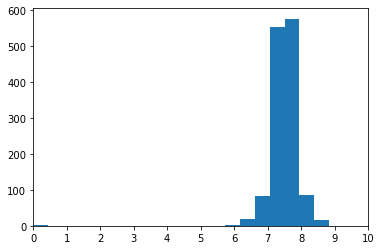

In [35]:
plt.hist(coffee_data.Flavor, bins = 20)
plt.xlim(0, 10)
plt.xticks(range(11))
plt.show()

Може да опитаме да направим същото нещо и за други колони.

In [38]:
cofee_data.Region.unique()

array(['guji-hambela', nan, 'oromia', 'oromiya',
       'snnp/kaffa zone,gimbowereda', 'antioquia', 'kona', 'sulawesi',
       'yirgacheffe', 'yunnan', 'gedio', 'san ramon', 'xalapa', 'sidamo',
       'south of minas', 'kapchorwa eastern', 'comayagua',
       'leye, alishan township, chiayi county', 'vale da grama',
       'west and central valley', 'muranga', 'chiang rai',
       'sul de minas - carmo de minas', 'natou county', 'nyeri',
       'eastern uganda', 'tolima', 'kiambu', 'sipi, mt elgon',
       'nuevo oriente', 'eastern', 'huila', 'boquete', 'acatenango',
       'addis ababa', 'cajamarca', 'eastern highlands province',
       'apaneca', 'ataco, apaneca - ilamatepec mountain range',
       'kirinyaga', 'bulambuli eastern region', 'huehuetenango',
       'kapchorwa', 'west valley', 'central kenya', 'oriente',
       'santander', 'lintong',
       'kefa zone, gimbo distict, at a place called woka araba, south west ethiopia.',
       'pasto', 'aricha', 'cundinamarca', 'tarrazu'

In [39]:
coffee_data.Region.value_counts()

huila                                                                      112
oriente                                                                     80
south of minas                                                              68
kona                                                                        66
veracruz                                                                    35
                                                                          ... 
phahi                                                                        1
mahuixtlan                                                                   1
52 narino (exact location: mattituy; municipal region: florida code 381      1
aceh                                                                         1
kwanza norte province, angola                                                1
Name: Region, Length: 356, dtype: int64

# Data Tidying and data Cleaning
Подреждане на данни и почистване на данни

Имаме таблица, която е двумерна и в нея имаме редове и колини. Всеки един ред представлява едно наблюдение. Не случайно наричаме таблицата дейта __сет__ . Редовете трябва да бъдат уникални или недубликирани. И също така един ред отговаря за един цял запис. Колоните ще бъдат основното нещо, което ще гледаме, когато работим в дейта саънс и машийн лърнинг. И това ще бъдат нашите отделни променливи.

Искаме да докараме данните до нормални форми, да ги нормализираме. 

Всяка една колона предтсавлява една променлива, едно измерение. Един запис бидейки комбинация от измерението с неговите коефициенти ще представлява, можем да го наречем вектор в пространството, можем да го наречем и точка в пространството.

Една клетка съдържа стойността за един запис и една променлива. В клетката трябва да имаме скаларни величини. Допустимо е да бъде една стойност (булеан, стринг, интиджър), а не колекция от стойности.

Една таблица (един дейта сет) в идеалния случей представлява матрица от данните. И формата в който са данните задължително трябва да спазва тези изисквания. 

Има разлика между структурирани/неструктурирани данни и подредени/неподредени данни.

Ако искаме да добавим нов запис трябва да добавим един цял ред. Първо трябва да идентифицираме какво означава един запис, трябва да идентифицираме променливите, които са в него.

In [40]:
pew = pd.read_csv("pew.csv")

In [41]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Можем да направим операцията, която е обратна на създаването на pivot table и се нарича melt:

In [43]:
pew.melt(id_vars = ["religion"], var_name= "income", value_name = "frequency")

,religion,income,frequency
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Don’t know/refused,<$10k,15
...,...,...,...
175,Orthodox,Don't know/refused,73
176,Other Christian,Don't know/refused,18
177,Other Faiths,Don't know/refused,71
178,Other World Religions,Don't know/refused,8


Това ни връща нов DataFrame. Оригиналният си е pew.

In [44]:
pew

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k,$75-100k,$100-150k,>150k,Don't know/refused
0,Agnostic,27,34,60,81,76,137,122,109,84,96
1,Atheist,12,27,37,52,35,70,73,59,74,76
2,Buddhist,27,21,30,34,33,58,62,39,53,54
3,Catholic,418,617,732,670,638,1116,949,792,633,1489
4,Don’t know/refused,15,14,15,11,10,35,21,17,18,116
5,Evangelical Prot,575,869,1064,982,881,1486,949,723,414,1529
6,Hindu,1,9,7,9,11,34,47,48,54,37
7,Historically Black Prot,228,244,236,238,197,223,131,81,78,339
8,Jehovah's Witness,20,27,24,24,21,30,15,11,6,37
9,Jewish,19,19,25,25,30,95,69,87,151,162


Когато правим трансформации на данни е хубаво да си оставяме техни копия. Така ще имаме това по което работим, но няма да сме забравили и оригиналното. Ето така ще запазим трансформацията:

In [47]:
pew_tidy = pew.melt(id_vars = ["religion"], var_name= "income", value_name = "frequency")

И като ги сравним виждаме, че колоните са различни:

In [49]:
pew.columns, pew_tidy.columns

(Index(['religion', '<$10k', '$10-20k', '$20-30k', '$30-40k', '$40-50k',
        '$50-75k', '$75-100k', '$100-150k', '>150k', 'Don't know/refused'],
       dtype='object'),
 Index(['religion', 'income', 'frequency'], dtype='object'))

In [50]:
pew_tidy.dtypes

religion     object
income       object
frequency     int64
dtype: object

Хубаво е, ако променливи са категорийни да окажем, че това е така.

In [56]:
pew_tidy.religion = pew_tidy.religion.astype("category")
pew_tidy.income = pew_tidy.income.astype("category")

Можем да направим всяко едно, което е object да стане category. И когато го извикаме пак това нещо виждаме, че това вече е категори:

In [57]:
pew_tidy.dtypes

religion     category
income       category
frequency       int64
dtype: object

In [60]:
pew_tidy.religion.unique()

['Agnostic', 'Atheist', 'Buddhist', 'Catholic', 'Don’t know/refused', ..., 'Orthodox', 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated']
Length: 18
Categories (18, object): ['Agnostic', 'Atheist', 'Buddhist', 'Catholic', ..., 'Other Christian', 'Other Faiths', 'Other World Religions', 'Unaffiliated']

Това работи по същия начин, само че вътрешно pandas ги кодира като числа, което в много голяма степен намалява паметта, която заема един DataFrame:

In [61]:
pew_tidy.religion.value_counts()

Agnostic                   10
Atheist                    10
Other World Religions      10
Other Faiths               10
Other Christian            10
Orthodox                   10
Muslim                     10
Mormon                     10
Mainline Prot              10
Jewish                     10
Jehovah's Witness          10
Historically Black Prot    10
Hindu                      10
Evangelical Prot           10
Don’t know/refused         10
Catholic                   10
Buddhist                   10
Unaffiliated               10
Name: religion, dtype: int64

Можем да видим вснощност това с метода memory_usage:

In [64]:
pew_tidy.memory_usage()

Index         128
religion      880
income        560
frequency    1440
dtype: int64

__%matplotlib inline__ помага да интегрираме графиките заедно с кода, който ги генерира. Просто влиза като част от notebook. Картинката влиза като base64 кодиран string.